In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('full_data.csv')

# New Section

In [5]:

data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [6]:
data.drop(data.index[(data["smoking_status"] == "Unknown")],axis=0,inplace=True)


In [7]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,3481.000000,3481.00000,3481.000000,3481.000000,3481.000000,3481.000000
mean,49.067509,0.12324,0.065211,108.769155,29.808159,0.057742
std,18.894255,0.32876,0.246934,48.133475,6.228310,0.233288
min,10.000000,0.00000,0.000000,55.120000,14.100000,0.000000
25%,34.000000,0.00000,0.000000,77.450000,25.300000,0.000000
50%,50.000000,0.00000,0.000000,92.490000,29.100000,0.000000
75%,64.000000,0.00000,0.000000,116.250000,33.500000,0.000000
max,82.000000,1.00000,1.000000,271.740000,48.900000,1.000000


In [8]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
data.duplicated().any()


False

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3481 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3481 non-null   object 
 1   age                3481 non-null   float64
 2   hypertension       3481 non-null   int64  
 3   heart_disease      3481 non-null   int64  
 4   ever_married       3481 non-null   object 
 5   work_type          3481 non-null   object 
 6   Residence_type     3481 non-null   object 
 7   avg_glucose_level  3481 non-null   float64
 8   bmi                3481 non-null   float64
 9   smoking_status     3481 non-null   object 
 10  stroke             3481 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 326.3+ KB


In [11]:
data['gender'].value_counts()

gender
Female    2099
Male      1382
Name: count, dtype: int64

In [12]:
data["gender"] = data["gender"].replace("Female", 1).replace("Male", 0)

In [13]:
data['ever_married'].value_counts()

ever_married
Yes    2656
No      825
Name: count, dtype: int64

In [14]:
data["ever_married"] = data["ever_married"].replace("Yes", 1).replace("No", 0)

In [15]:
data['work_type'].value_counts()

work_type
Private          2237
Self-employed     651
Govt_job          524
children           69
Name: count, dtype: int64

In [16]:
data["work_type"] = data["work_type"].replace("Private", 0).replace("Self-employed", 1).replace("children", 2).replace("Govt_job", 3)

In [17]:
data['Residence_type'].value_counts()

Residence_type
Urban    1774
Rural    1707
Name: count, dtype: int64

In [18]:
data["Residence_type"] = data["Residence_type"].replace("Urban", 1).replace("Rural", 0)

In [19]:
data['smoking_status'].value_counts()

smoking_status
never smoked       1838
formerly smoked     867
smokes              776
Name: count, dtype: int64

In [20]:
data["smoking_status"] = data["smoking_status"].replace("never smoked", 0).replace("formerly smoked", 1).replace("smokes", 2)

In [21]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,1,228.69,36.6,1,1
1,0,80.0,0,1,1,0,0,105.92,32.5,0,1
2,1,49.0,0,0,1,0,1,171.23,34.4,2,1
3,1,79.0,1,0,1,1,0,174.12,24.0,0,1
4,0,81.0,0,0,1,0,1,186.21,29.0,1,1


In [22]:
data['smoking_status'].value_counts()

smoking_status
0    1838
1     867
2     776
Name: count, dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3481 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3481 non-null   int64  
 1   age                3481 non-null   float64
 2   hypertension       3481 non-null   int64  
 3   heart_disease      3481 non-null   int64  
 4   ever_married       3481 non-null   int64  
 5   work_type          3481 non-null   int64  
 6   Residence_type     3481 non-null   int64  
 7   avg_glucose_level  3481 non-null   float64
 8   bmi                3481 non-null   float64
 9   smoking_status     3481 non-null   int64  
 10  stroke             3481 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 326.3 KB


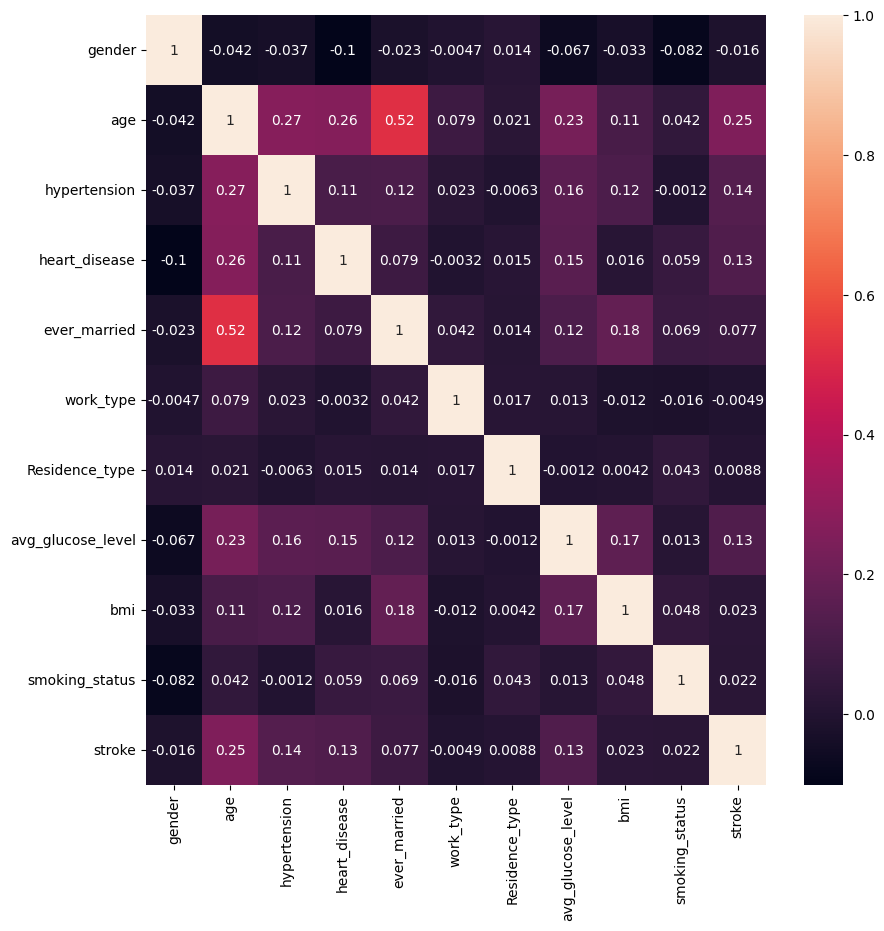

In [24]:
corr = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True)
plt.show()

<ipython-input-25-866218b5e888>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="gender", data=data, palette="Blues_d")


Text(0.5, 1.0, 'Female = 1 & Male = 0')

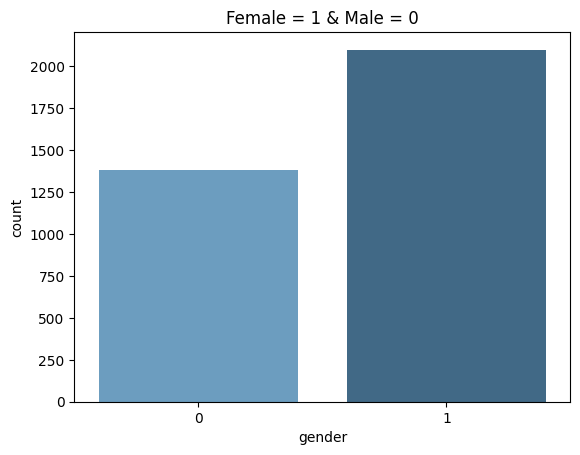

In [25]:
ax = sns.countplot(x="gender", data=data, palette="Blues_d")
plt.title("Female = 1 & Male = 0")

<ipython-input-26-f3d2aec2304f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="hypertension", data=data, palette="Blues_d")


Text(0.5, 1.0, "0 = Doesn't have hypertension & 1 = Have hypertension")

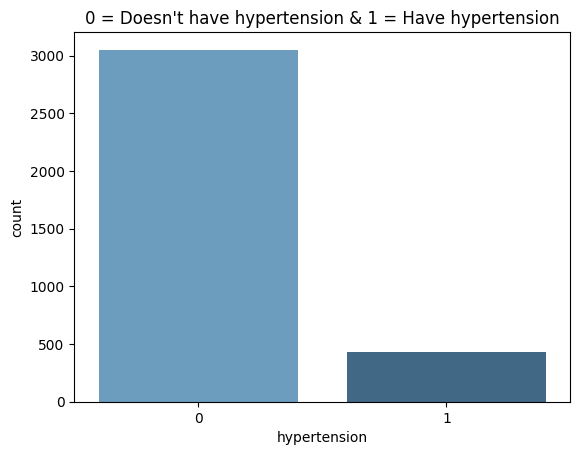

In [26]:
ax = sns.countplot(x="hypertension", data=data, palette="Blues_d")
plt.title("0 = Doesn't have hypertension & 1 = Have hypertension")

<ipython-input-27-296133d006b3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="heart_disease", data=data, palette="Blues_d")


Text(0.5, 1.0, "0 = Doesn't have heart disease & 1 = Have heart disease")

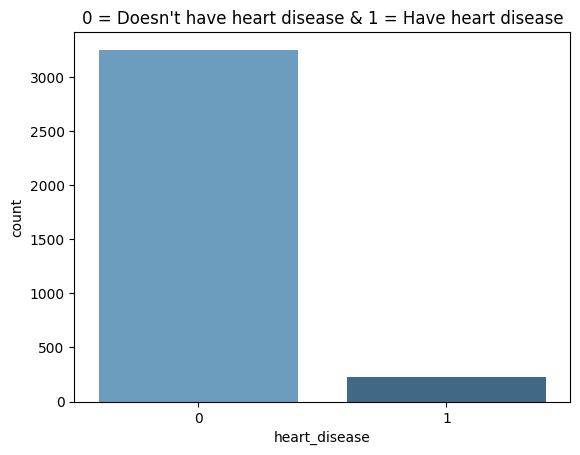

In [27]:
ax = sns.countplot(x="heart_disease", data=data, palette="Blues_d")
plt.title("0 = Doesn't have heart disease & 1 = Have heart disease")

<ipython-input-28-e00a25923a2f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="ever_married", data=data, palette="Blues_d")


Text(0.5, 1.0, "0 = Doesn't married & 1 = Ever married")

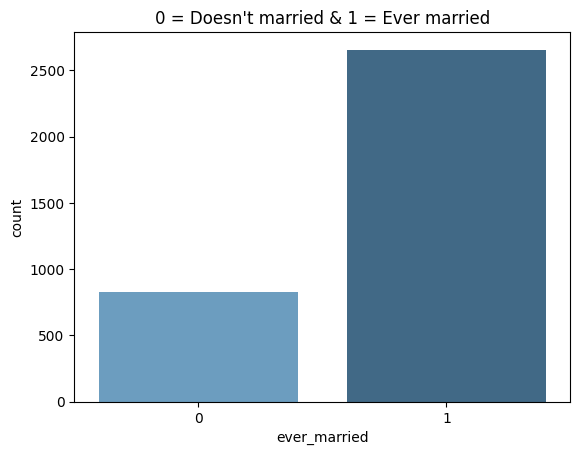

In [28]:
ax = sns.countplot(x="ever_married", data=data, palette="Blues_d")
plt.title("0 = Doesn't married & 1 = Ever married")

<ipython-input-29-3dbdc65effff>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="work_type", data=data, palette="Blues_d")


Text(0.5, 1.0, '0 = Private & 1 = Self-employed & 2 = children & 3 = Govt_job')

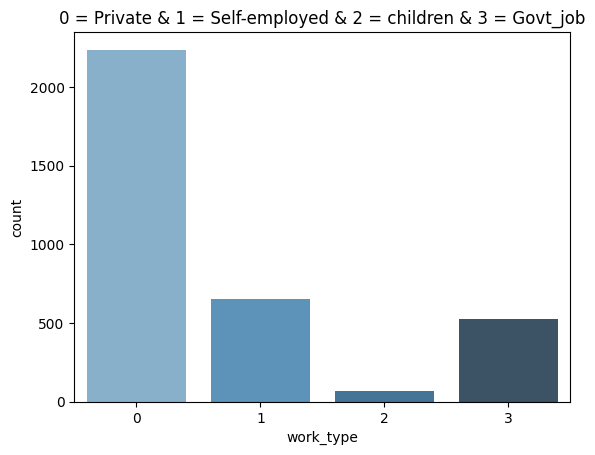

In [29]:
ax = sns.countplot(x="work_type", data=data, palette="Blues_d")
plt.title("0 = Private & 1 = Self-employed & 2 = children & 3 = Govt_job")

<ipython-input-32-50b245a3bf87>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="smoking_status", data=data, palette="Blues_d")


Text(0.5, 1.0, '0 = never smoked & 1 = formerly smoked & 2 = smokes')

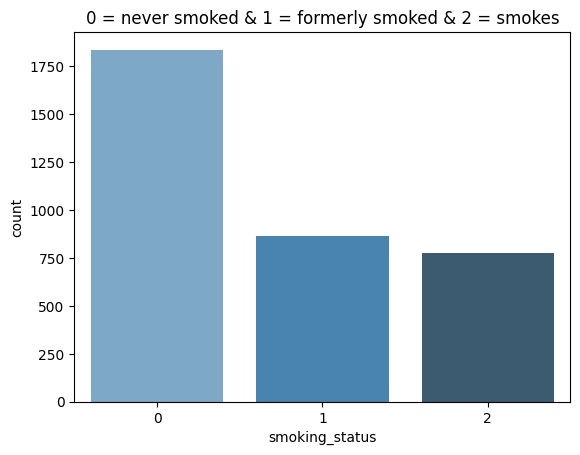

In [32]:
ax = sns.countplot(x="smoking_status", data=data, palette="Blues_d")
plt.title("0 = never smoked & 1 = formerly smoked & 2 = smokes")

In [33]:
data.groupby(['hypertension', 'heart_disease']).agg({'hypertension': 'count'})

hypertension
hypertension heart_disease              
0            0                      2884
             1                       168
1            0                       370
             1                        59

<ipython-input-31-721a276f4646>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Residence_type", data=data, palette="Blues_d")


Text(0.5, 1.0, '0 = Rural & 1 = Urban')

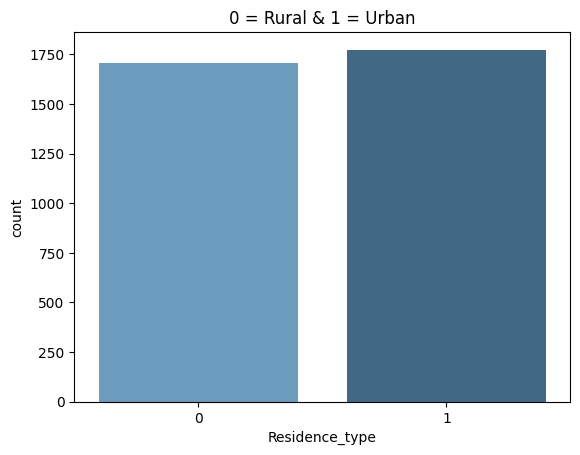

In [31]:
ax = sns.countplot(x="Residence_type", data=data, palette="Blues_d")
plt.title("0 = Rural & 1 = Urban")

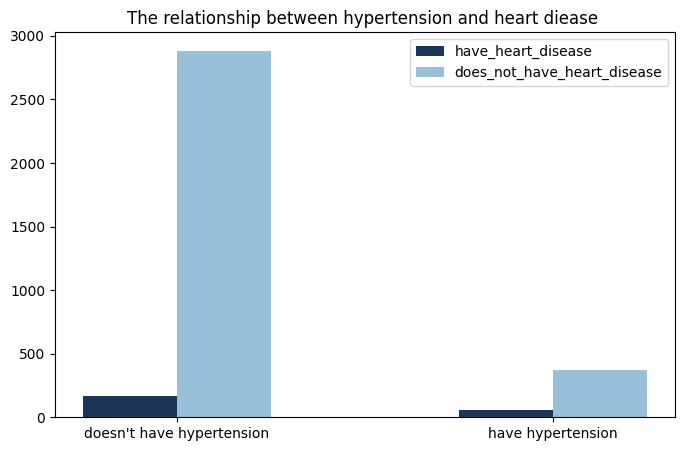

In [34]:
have_heart_disease = (168, 59)
does_not_have_heart_disease = (2884, 370)
X = np.arange(2)
plt.figure(figsize=(8, 5))
width = 0.25
plt.bar(X, have_heart_disease, width, label='have_heart_disease', color="#1d3557")
plt.bar(X + width, does_not_have_heart_disease, width, label='does_not_have_heart_disease', color="#98c1d9")
plt.xticks(X + width / 2, ("doesn't have hypertension", "have hypertension"))
plt.title("The relationship between hypertension and heart diease ")
plt.legend(loc='best')

In [35]:
grouped = data.groupby(data.stroke)
data_new1 = grouped.get_group(1)
data_new1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,1,228.69,36.6,1,1
1,0,80.0,0,1,1,0,0,105.92,32.5,0,1
2,1,49.0,0,0,1,0,1,171.23,34.4,2,1
3,1,79.0,1,0,1,1,0,174.12,24.0,0,1
4,0,81.0,0,0,1,0,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4810,1,79.0,1,1,0,1,0,60.94,28.8,0,1
4811,1,78.0,0,0,1,1,0,60.67,27.1,1,1
4815,0,79.0,0,0,1,0,0,114.77,27.2,1,1
4817,1,76.0,1,1,1,1,1,199.86,31.7,2,1


In [36]:
data_new1['gender'].value_counts()

gender
1    115
0     86
Name: count, dtype: int64

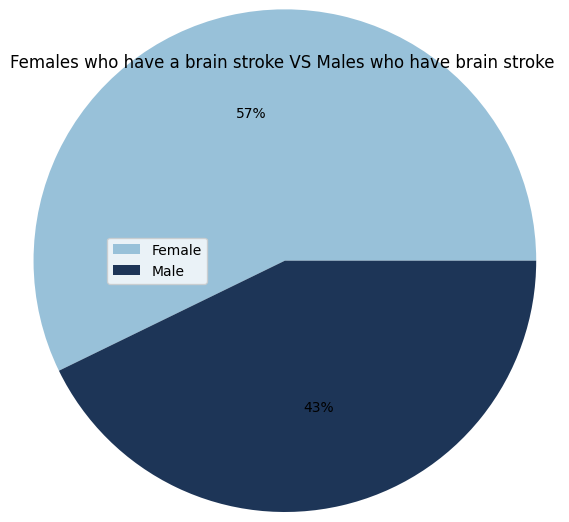

In [37]:
gender=[115, 86]
plt.pie(gender,  radius=1.7, colors=["#98c1d9", "#1d3557"],
        rotatelabels=False, autopct= "%1.0f%%")
plt.title('Females who have a brain stroke VS Males who have brain stroke ')
plt.legend(labels=["Female", "Male"])

Text(0.5, 1.0, '0 = never smoked & 1 = formerly smoked & 2 = smokes')

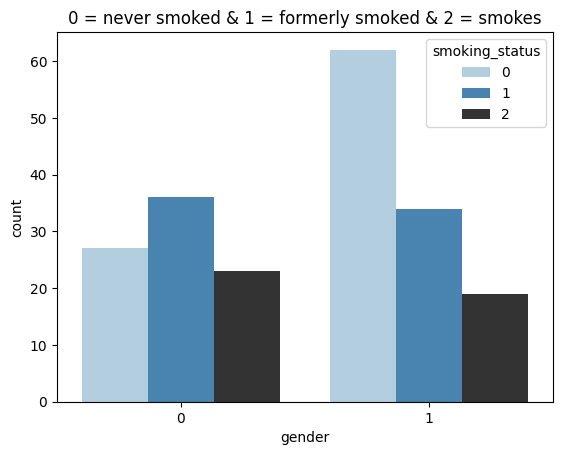

In [38]:
ax = sns.countplot(x="gender", hue = "smoking_status" ,data=data_new1, palette="Blues_d")
plt.title("0 = never smoked & 1 = formerly smoked & 2 = smokes")

In [39]:
data_new1.groupby(['gender', 'hypertension']).agg({'hypertension': 'count'})




hypertension
gender hypertension              
0      0                       61
       1                       25
1      0                       78
       1                       37

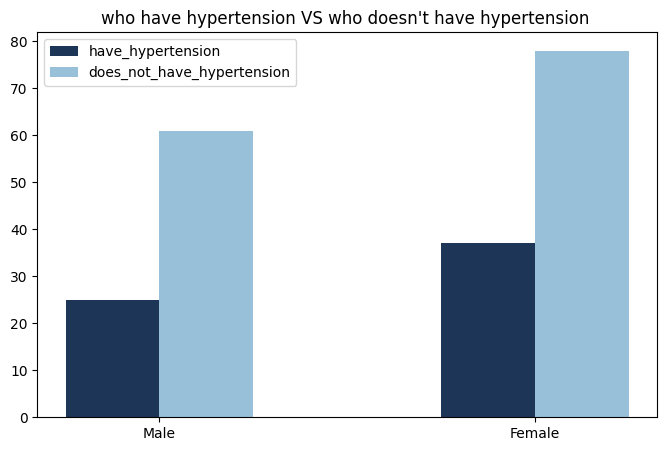

In [40]:
have_hypertension = (25, 37)
does_not_have_hypertension = (61,78)
X = np.arange(2)
plt.figure(figsize=(8, 5))
width = 0.25
plt.bar(X, have_hypertension, width, label='have_hypertension', color="#1d3557")
plt.bar(X + width, does_not_have_hypertension, width, label='does_not_have_hypertension', color="#98c1d9")
plt.xticks(X + width / 2, ("Male", "Female"))
plt.title("who have hypertension VS who doesn't have hypertension ")
plt.legend(loc='best')

In [41]:
data_new1.groupby(['gender', 'heart_disease']).agg({'heart_disease': 'count'})

heart_disease
gender heart_disease               
0      0                         63
       1                         23
1      0                         99
       1                         16

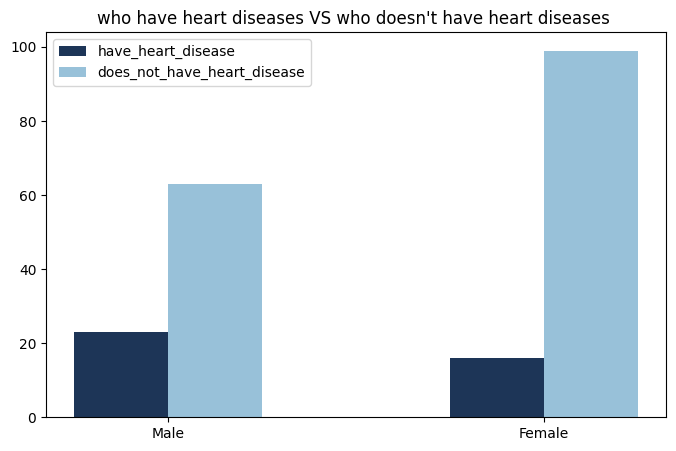

In [42]:
have_heart_disease = (23, 16)
does_not_have_heart_disease = (63, 99)
X = np.arange(2)
plt.figure(figsize=(8, 5))
width = 0.25
plt.bar(X, have_heart_disease, width, label='have_heart_disease', color="#1d3557")
plt.bar(X + width, does_not_have_heart_disease, width, label='does_not_have_heart_disease', color="#98c1d9")
plt.xticks(X + width / 2, ("Male", "Female"))
plt.title("who have heart diseases VS who doesn't have heart diseases ")
plt.legend(loc='best')

In [43]:
data_new1.groupby(['gender', 'ever_married']).agg({'ever_married': 'count'})

ever_married
gender ever_married              
0      0                        6
       1                       80
1      0                       15
       1                      100

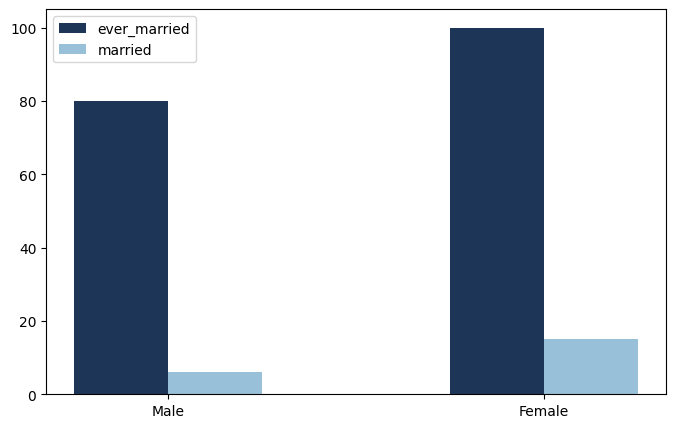

In [44]:
ever_married = (80, 100)
married = (6, 15)
X = np.arange(2)
plt.figure(figsize=(8, 5))
width = 0.25
plt.bar(X, ever_married, width, label='ever_married', color="#1d3557")
plt.bar(X + width, married, width, label='married', color="#98c1d9")
plt.xticks(X + width / 2, ("Male", "Female"))
plt.legend(loc='best')

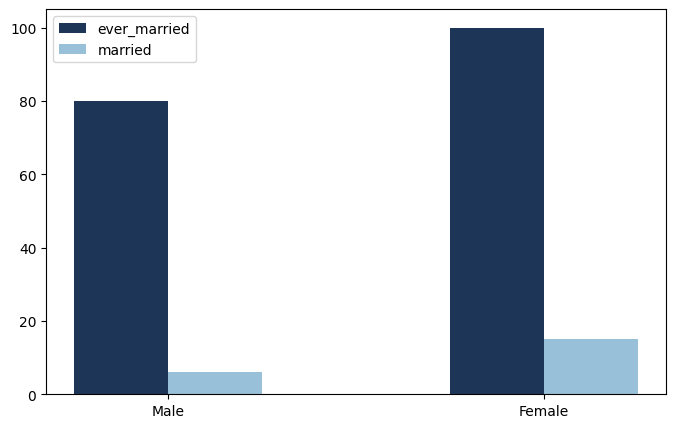

In [45]:
ever_married = (80, 100)
married = (6, 15)
X = np.arange(2)
plt.figure(figsize=(8, 5))
width = 0.25
plt.bar(X, ever_married, width, label='ever_married', color="#1d3557")
plt.bar(X + width, married, width, label='married', color="#98c1d9")
plt.xticks(X + width / 2, ("Male", "Female"))
plt.legend(loc='best')

In [46]:
data_new1.groupby(['gender', 'Residence_type']).agg({'smoking_status': 'count'})

smoking_status
gender Residence_type                
0      0                           41
       1                           45
1      0                           54
       1                           61

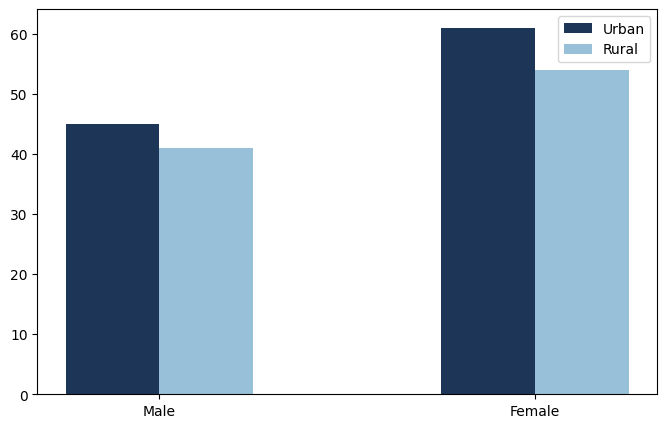

In [47]:
Urban = (45, 61)
Rural = (41, 54)
X = np.arange(2)
plt.figure(figsize=(8, 5))
width = 0.25
plt.bar(X, Urban, width, label='Urban', color="#1d3557")
plt.bar(X + width, Rural, width, label='Rural', color="#98c1d9")
plt.xticks(X + width / 2, ("Male", "Female"))
plt.legend(loc='best')

Text(0.5, 1.0, 'Gender VS smoking_status')

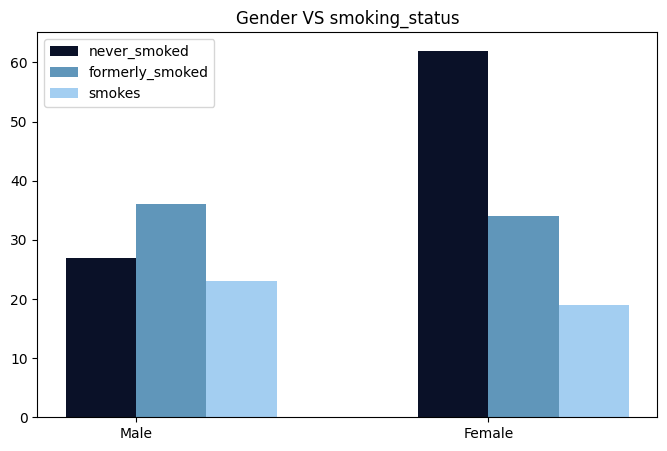

In [48]:
never_smoked  = (27, 62)
formerly_smoked = (36 , 34)
smokes = (23 , 19)
X = np.arange(2)
plt.figure(figsize=(8, 5))
width = 0.20
plt.bar(X, never_smoked, width, label='never_smoked', color="#0a1128")
plt.bar(X+width, formerly_smoked, width, label='formerly_smoked', color="#6096ba")
plt.bar(X+2* width, smokes, width, label='smokes', color="#a3cef1")
plt.xticks(X + width / 2, ("Male", "Female"))
plt.legend(loc='best')
plt.title("Gender VS smoking_status")

In [49]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [56]:
y = data.stroke
list = ['stroke']
x = data.drop(list,axis = 1 )
x.head()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 0)

In [57]:
logreg.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
y_pred = logreg.predict(x_test)

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       824
           1       0.00      0.00      0.00        47

    accuracy                           0.94       871
   macro avg       0.47      0.50      0.49       871
weighted avg       0.89      0.94      0.92       871



In [60]:
score = logreg.score(x_test, y_test)
print(score)

0.9448909299655568


In [61]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[823,   1],
       [ 47,   0]])

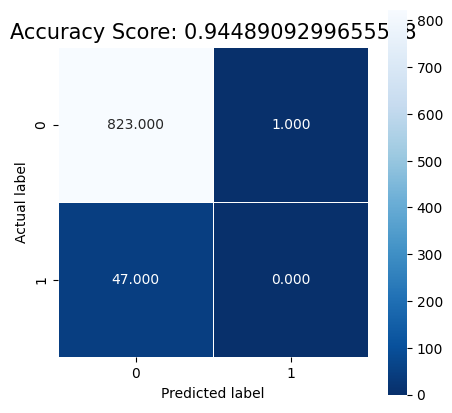

In [62]:
plt.figure(figsize=(5,5))
sns.heatmap(cnf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [63]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,  p=2)

In [64]:
classifier.fit(x_train, y_train)


KNeighborsClassifier()

In [65]:
y_pred = classifier.predict(x_test)

In [66]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[812,  12],
       [ 46,   1]])

In [67]:
from sklearn.metrics import accuracy_score
score = classifier.score(x_test, y_test)
print(score)

0.9334098737083811
